# DecisionTreeClassifier 실습
(product_RF_김혜빈)

# 1. 실습용 데이터 설정
- import Package
   - Product.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
df.info()
# 15009행 12열
# y = customerType(online, offline)
# X = orderType_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# 2. 탐색적 데이터 분석
> ## 1) 빈도 분석

In [ ]:
df.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

> ## 2) 분포 시각화

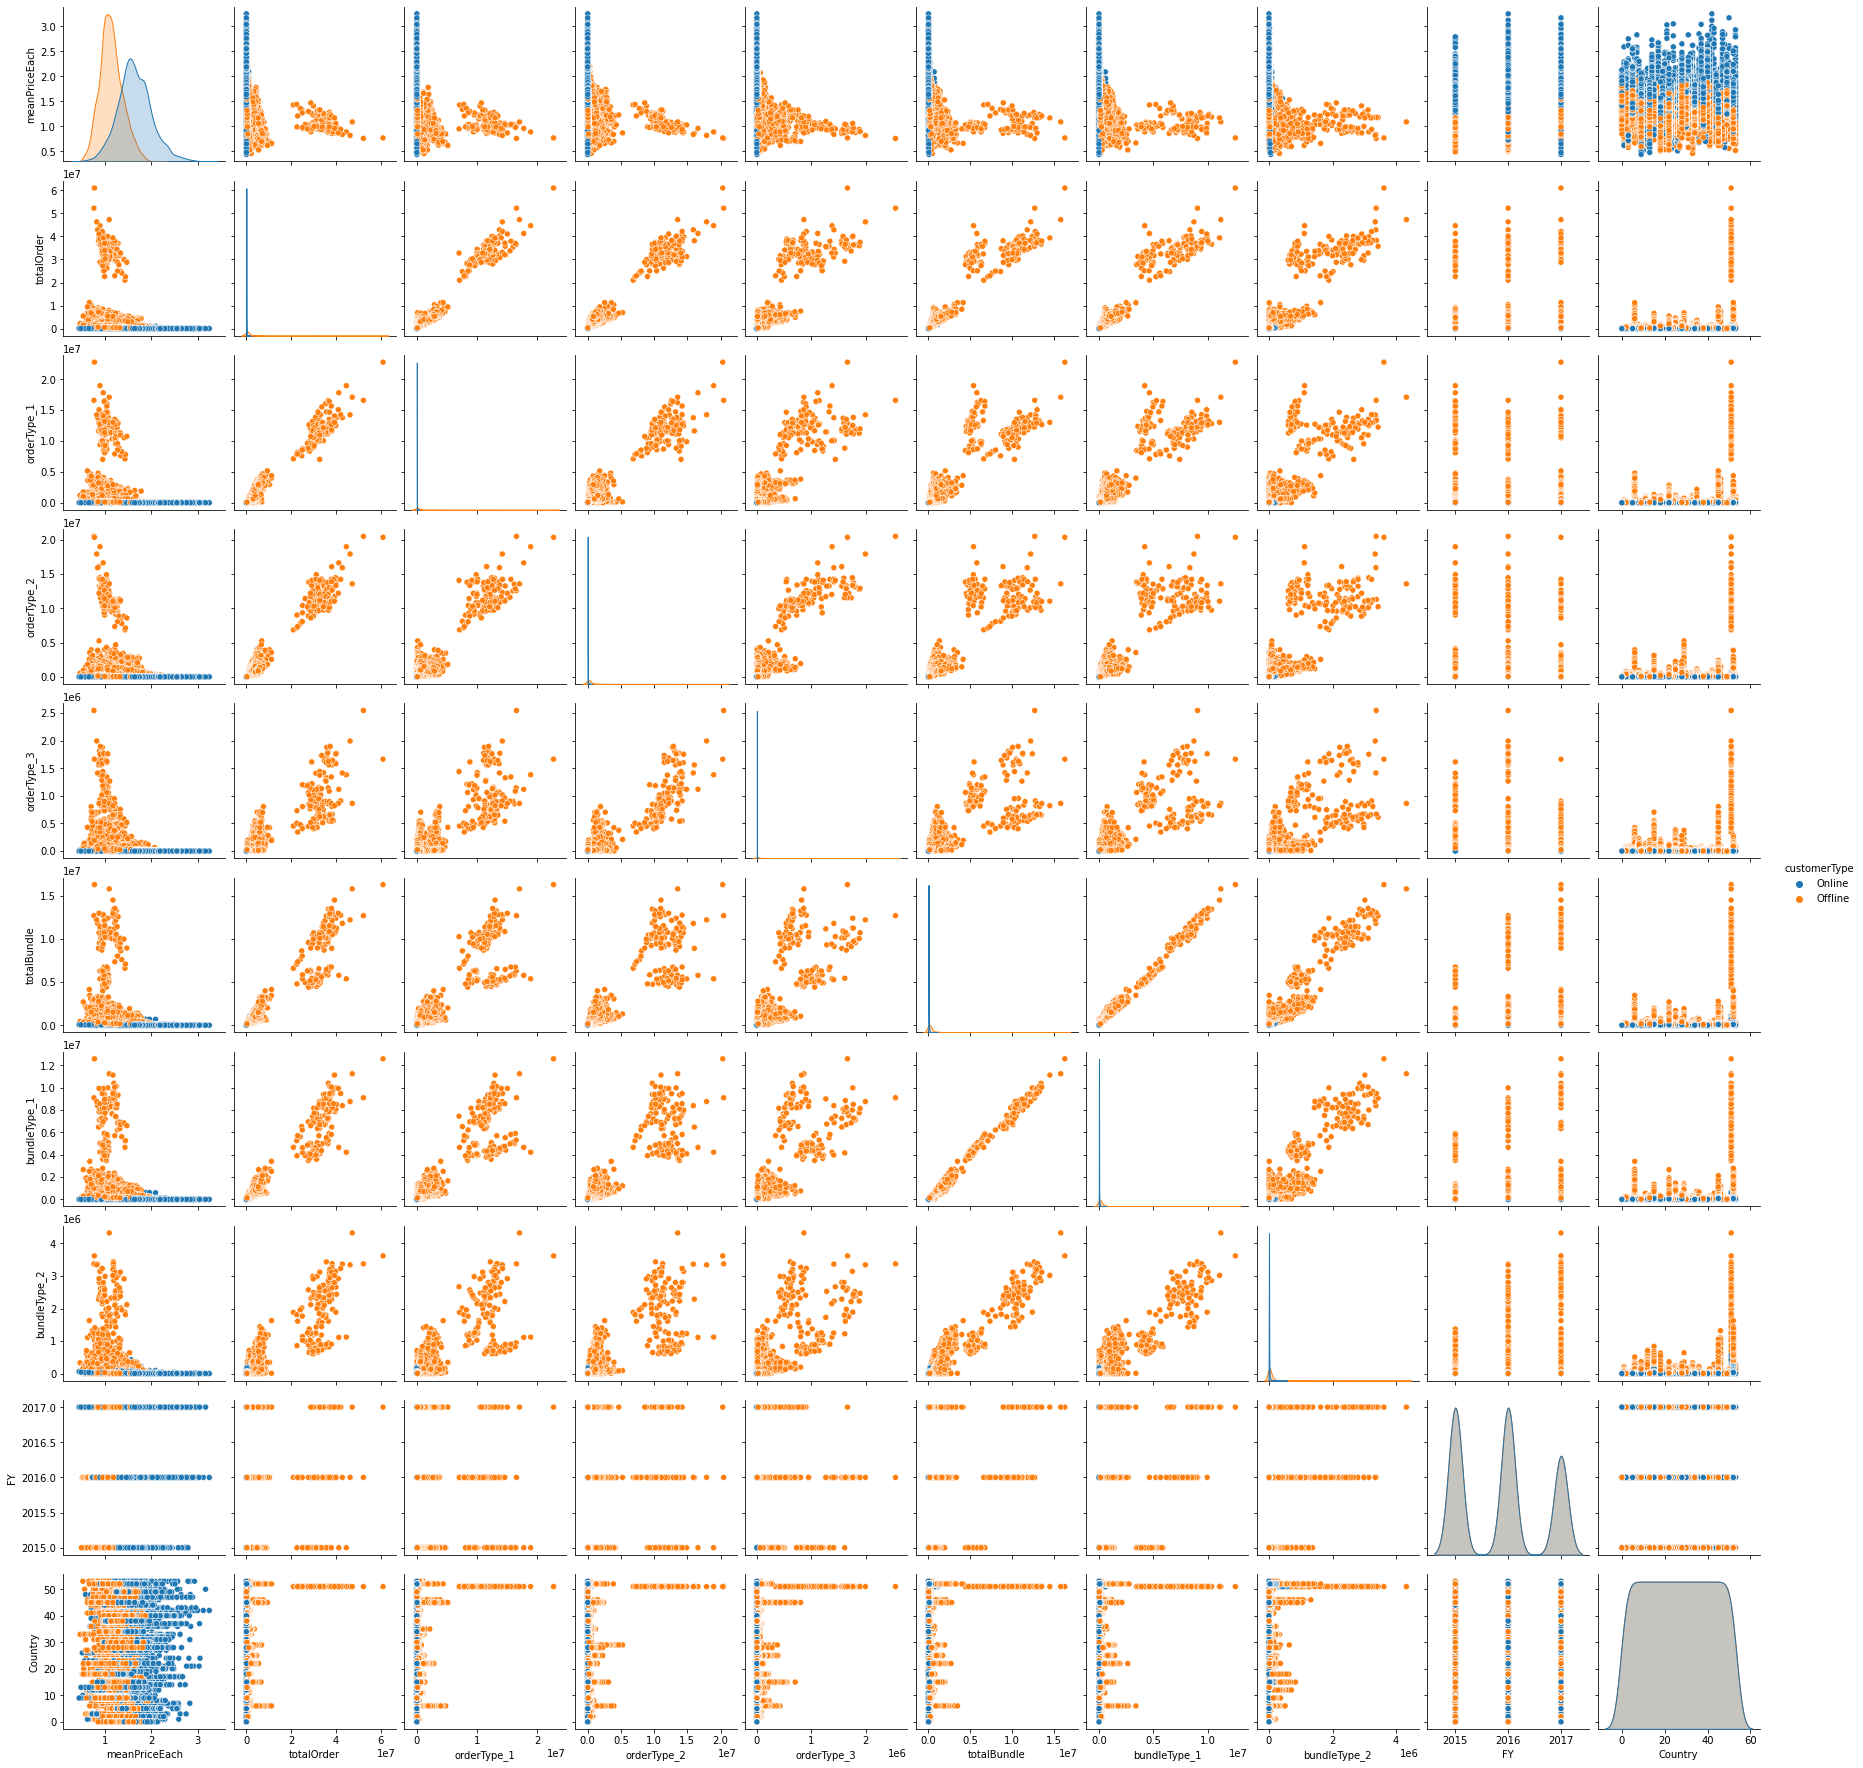

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(hue = 'customerType', data = df)
plt.show()

# 3. Data Preprocessing
> ## 1) Data Set

In [ ]:
X = df[['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country' ]]
y = df['customerType']

> ## 2) Train & Test Split

- 7 : 3 (10506 : 4503) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)   

Train Data :  (10506, 10) (10506,)
Test Data :  (4503, 10) (4503,)


# 4. RandomForestClassifier Modeling
> ## 1) Train_Data로 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 10, 
                                  max_features = 5,
                                  random_state = 2045,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2045, verbose=0,
                       warm_start=False)

> ## 2) Test_Data에 모델 적용

In [ ]:
y_hat = model_rf.predict(X_test)

> ## 3) Model Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_hat))
# Offline은 2227개 중 3개 틀렸고, Online은 2276개 중 27개 틀렸다. 

[[2224    3]
 [  27 2249]]


In [ ]:
RF_ac = accuracy_score(y_test, y_hat)
print(RF_ac)
# 정확도 99.3%

0.9933377748167888


> ## 4) Feature Importance

- Feature Importance 값 확인

In [ ]:
model_rf.feature_importances_

array([0.04531214, 0.54386151, 0.02717672, 0.02581874, 0.07389317,
       0.13568685, 0.07292592, 0.01433949, 0.0012467 , 0.05973877])

- Feature Importance 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


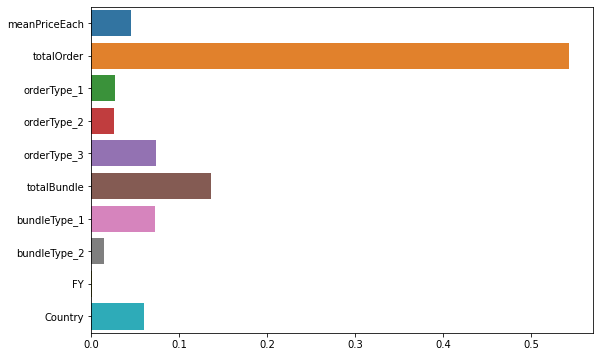

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(model_rf.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country'])
plt.show()
# totalOrder의 기여도가 가장 높다.

# 5. Hyperparameter Tuning 

> ## 1) RandomForestClassifier 객체 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

> ## 2) GridSearchCV Hyperparameters 설정

- GridSearchCV : 모든 경우의 수를 조합해서 최적의 파라미터 찾는 메서드

In [ ]:
params = {'n_estimators' : [100, 300, 500, 700],
          'max_features' : [5, 6, 7, 8, 9],
          'max_depth' : [3, 5, 7, 9],
          'random_state' : [2045]}

> ## 3) GridSearchCV 객체 생성

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
grid_cv = GridSearchCV(model_rf,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv = KFold(n_splits = 5, 
                                  random_state = 2045),
                       refit = True,
                       n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


> ## 4) GridSearchCV 수행

- 약 43분
- Train_Data에 적용

In [ ]:
from datetime import datetime
start_time = datetime.now()
grid_cv.fit(X_train, y_train)
end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:43:07.778417


> ## 5) 최적 Hyperparameter 확인

- (4 x 5 x 4) x 5 = 400번 실행 후 얻은 결과  

- Best Accuracy

In [ ]:
grid_cv.best_score_

0.9950504290693889

- Best Hyperparameter

In [ ]:
grid_cv.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 700, 'random_state': 2045}

> ## 6) 최적 모델 생성 및 평가

- Best Model
- Test_Data에 적용

In [ ]:
model_CV = grid_cv.best_estimator_
model_CV

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=2045,
                       verbose=0, warm_start=False)

- Evaluation

In [ ]:
y_hat = model_CV.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_hat))

[[2219    8]
 [  35 2241]]


In [ ]:
RF_gs_ac = accuracy_score(y_test, y_hat)
print(RF_gs_ac)

0.9904508105707306


> ## 7) Feature Importance

- Feature Importance 값 확인

In [ ]:
model_CV.feature_importances_

array([0.04674063, 0.4007011 , 0.03633492, 0.07492126, 0.09546901,
       0.09200626, 0.1892648 , 0.00853351, 0.00159368, 0.05443483])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


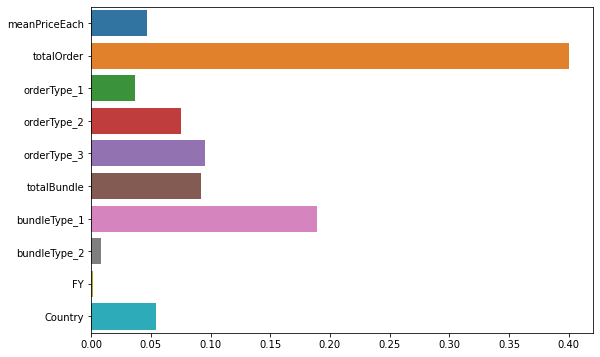

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(model_CV.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country'])
plt.show()
# totalOrder의 기여도가 가장 높다. RF에서 0.54였던 것에 비해 0.40으로 떨어졌다.
# bundleType_1의 기여도가 많이 올라왔다. 

# 6. 결과 비교 
## LogisticRegression, DecisionTreeClassifier(pruning x / o)

> ## 1) LogisticRegression
> ### (1) Modeling

- Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Test_Data에 Model 적용

In [ ]:
y_hat = model_lr.predict(X_test)
y_hat 

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> ### (4) Evaluation

- (1) Accuracy

- Test Accuracy

In [ ]:
LR_ac = accuracy_score(y_test, y_hat)
print(LR_ac)

0.9316011547856984


-  (2) Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[1979,  248],
       [  60, 2216]])

> ## 1) DecisionTreeClassifier(pruning x)
> ### (1) Modeling

- Train_Data로 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 2045)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

> ### (2) Visualization

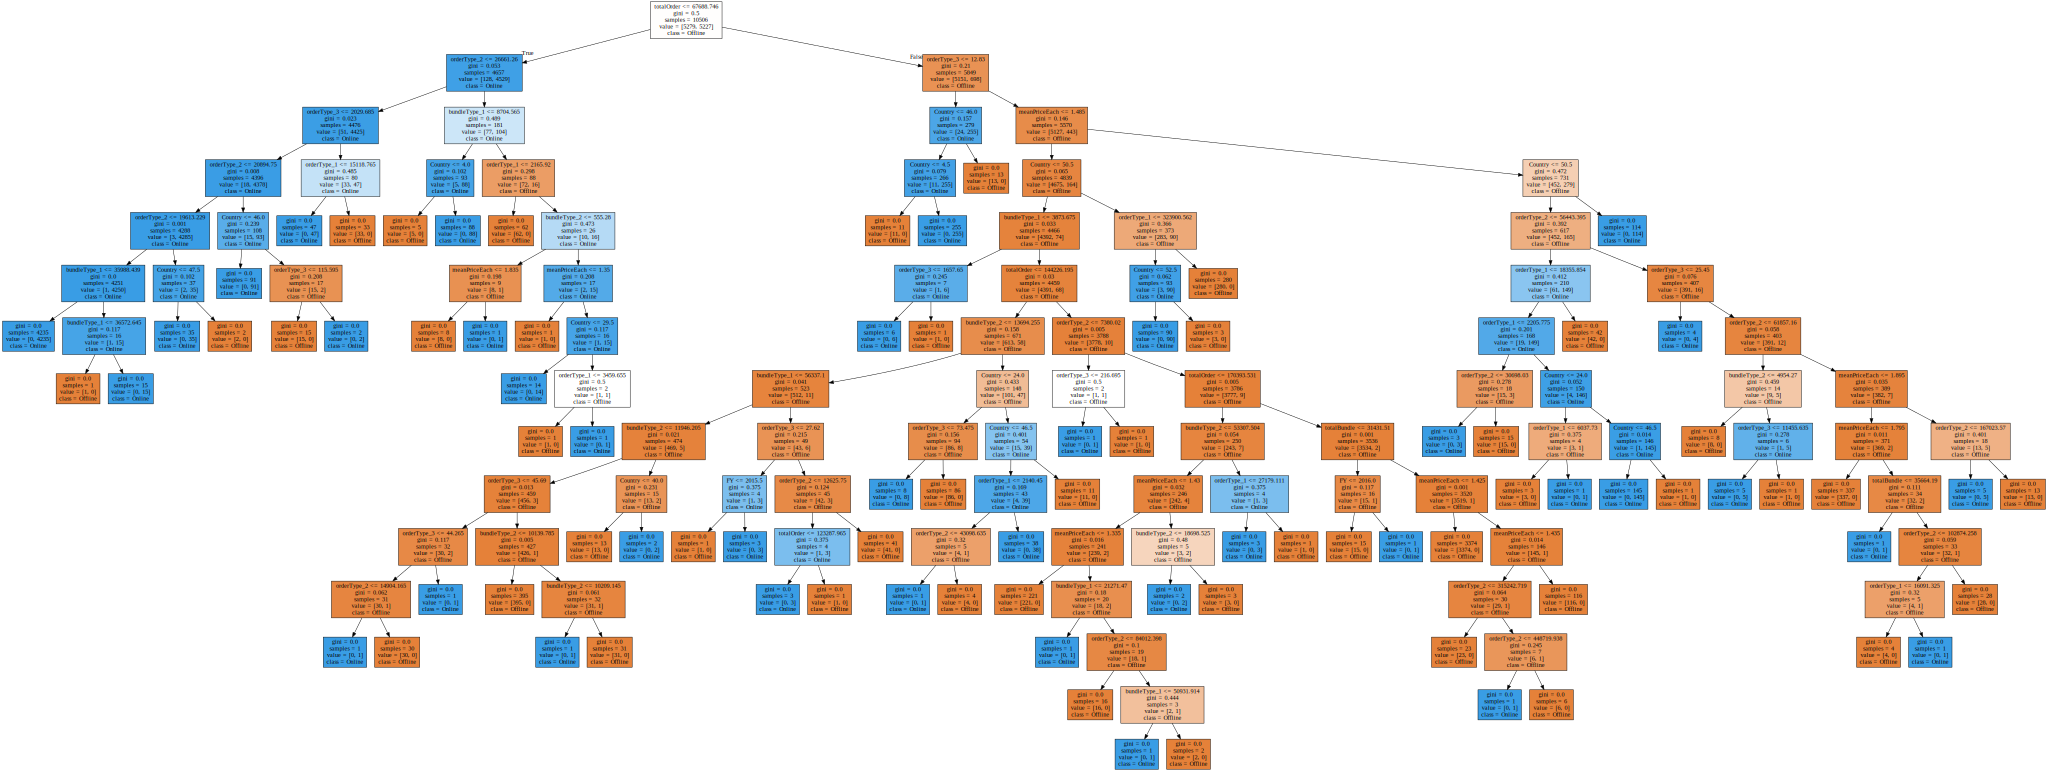

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(model_dt,
                                class_names = (['Offline', 'Online']),
                                feature_names = (['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country']),
                                filled = True))

> ### (3) Test_Data에 모델 적용

In [ ]:
y_hat = model_dt.predict(X_test)
y_hat

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> ### (4) Evaluation

- (1) Accuracy

- Test Accuracy

In [ ]:
DT_ac = accuracy_score(y_test, y_hat)
print(DT_ac)

0.9882300688429936


-  (2) Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[2208,   19],
       [  34, 2242]])

- (3) Feature_importances

In [ ]:
model_dt.feature_importances_

array([3.07927859e-02, 7.20436198e-01, 5.11038773e-02, 4.09514501e-02,
       8.21793659e-02, 3.70962387e-04, 1.31165794e-02, 7.83383166e-03,
       6.42505746e-04, 5.25724431e-02])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


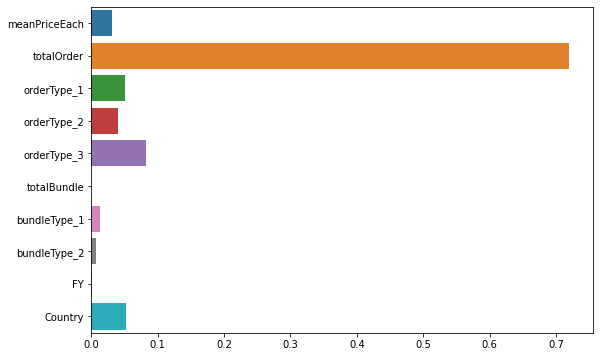

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(model_dt.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country'])
plt.show()

> ## 1) DecisionTreeClassifier(pruning o)
> ### (1) Modeling

- Train_Data로 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_pr = DecisionTreeClassifier(max_depth = 5, 
                                  random_state = 2045)
model_pr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

> ### (2) Visualization

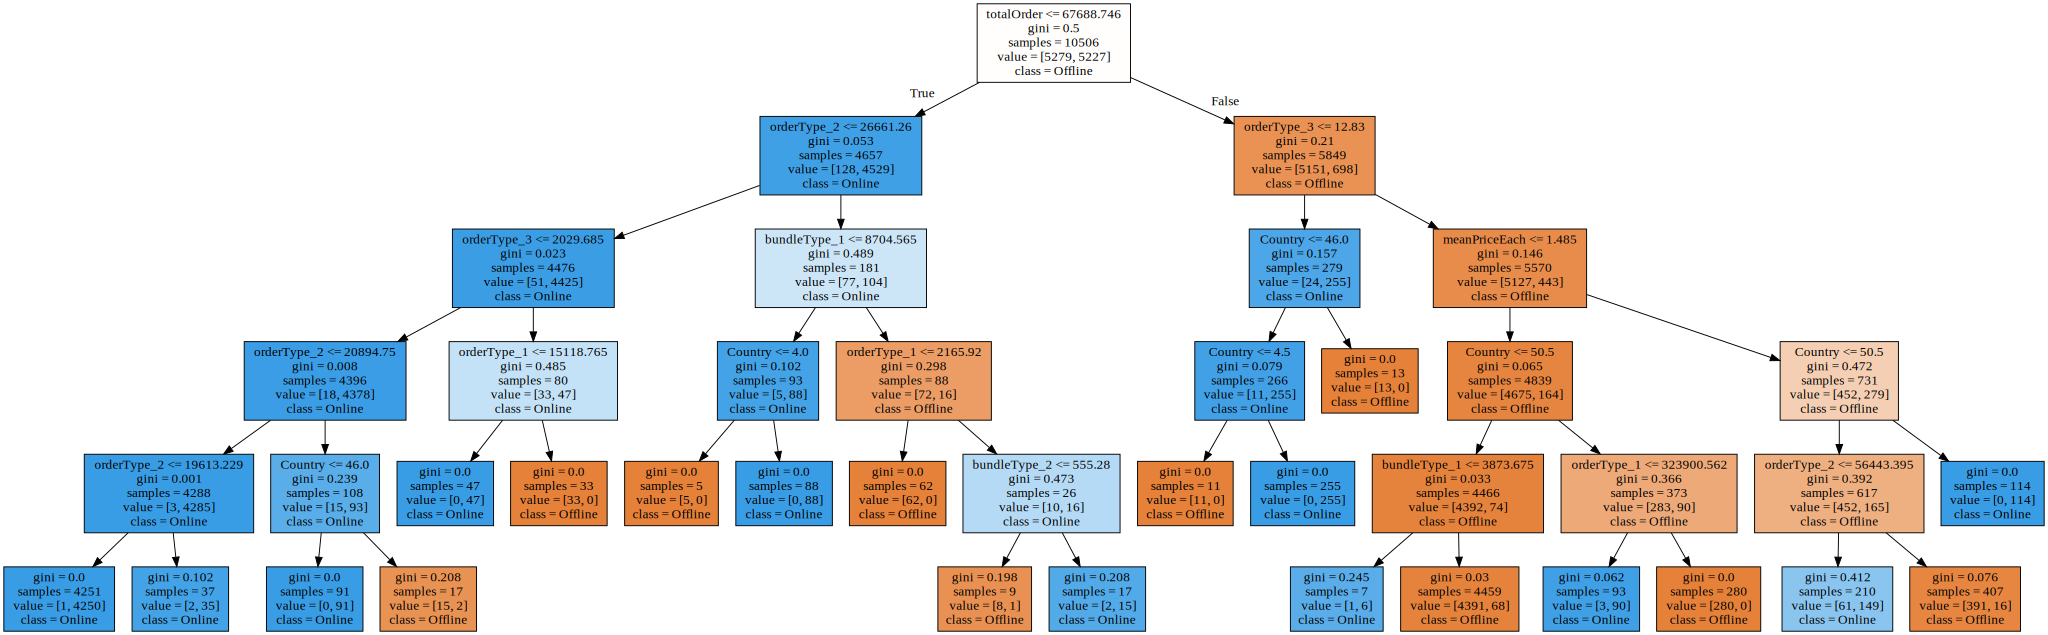

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(model_pr,
                                class_names = (['Offline', 'Online']),
                                feature_names = (['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country']),
                                filled = True))

> ### (4) Evaluation

- (1) Accuracy

- Test Accuracy

In [ ]:
DT_p_ac = accuracy_score(y_test, y_hat)
print(DT_p_ac)

0.9882300688429936


-  (2) Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[2208,   19],
       [  34, 2242]])

- (3) Feature_importances

In [ ]:
model_pr.feature_importances_

array([0.03085072, 0.75800803, 0.03683322, 0.03781948, 0.07956856,
       0.        , 0.01260155, 0.00140586, 0.        , 0.04291257])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


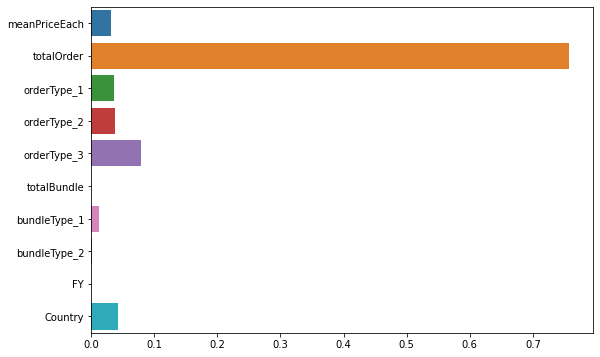

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(model_pr.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3', 'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country'])
plt.show()

# 7. 결론

In [ ]:
df_result = pd.DataFrame({"Model" : ['RandomF', 'RandomF_GS', 'LogisticR', 'DecisionT_x', 'DecisionT_o'],
                          "Accuracy" : [RF_ac, RF_gs_ac, LR_ac, DT_ac, DT_p_ac],})
                          
df_result.sort_values(by=['Accuracy'], axis=0, ascending=False)

,모델,Accuracy
0,RandomF,0.993338
1,RandomF_GS,0.990451
3,DecisionT_x,0.988230
4,DecisionT_o,0.988230
2,LogisticR,0.931601
